In [1]:
"""
Fits a quadratic function to the data. 

Reports fit parameter covariance, etc.

Follows example from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
"""

'\nFits a quadratic function to the data. \n\nReports fit parameter covariance, etc.\n\nFollows example from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html\n'

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [3]:
# Read Data
dfname = 'output2.csv'
raw_data = np.genfromtxt(dfname, delimiter=',', skip_header=1)
# Each element of data is a row from the csv file, so convert to columns
data = np.transpose(raw_data)
# data[0] = Blocker factors
# data[1] = Reimers factors
# data[2] = CO WD Mass

In [4]:
ivars = data[0:2] # independent variables
dvars = data[2]   # dependent variable

In [5]:
pnames = ['cx2', 'cy2', 'cxy', 'cx', 'cy', 'c0']

In [6]:
# Define fitting function
def quadratic_2d(z, cx2, cy2, cxy, cx, cy, c0):
    x = z[0]
    y = z[1]
    f = c0 + cx * x + cy * y + cxy * x * y + cx2 * x**2 + cy2 * y**2
    return f

In [7]:
# Fit quadratic_2d to data
popt, pcov = curve_fit(quadratic_2d, ivars, dvars)

In [8]:
popt

array([ 5.76875669, -0.20601277,  0.46457352, -1.13227515,  0.13778614,
        0.55956725])

In [9]:
pcov

array([[  3.45449816e-01,   6.69013176e-04,  -6.20771591e-03,
         -3.22553877e-02,  -3.87529187e-04,   5.82322159e-04],
       [  6.69013176e-04,   2.94991103e-04,  -5.16965412e-05,
         -2.74599872e-05,  -3.56020014e-04,   9.77414315e-05],
       [ -6.20771591e-03,  -5.16965412e-05,   6.86990897e-03,
         -3.48151173e-03,  -2.81451563e-04,   1.76128240e-04],
       [ -3.22553877e-02,  -2.74599872e-05,  -3.48151173e-03,
          5.67815461e-03,   1.93663448e-04,  -1.72863251e-04],
       [ -3.87529187e-04,  -3.56020014e-04,  -2.81451563e-04,
          1.93663448e-04,   4.52975636e-04,  -1.31043671e-04],
       [  5.82322159e-04,   9.77414315e-05,   1.76128240e-04,
         -1.72863251e-04,  -1.31043671e-04,   4.15766914e-05]])

For data with unknown uncertainties (e.g. CO WD Mass with no uncertainty),
the covariance matrix is computed by using a variance calculated as the variance 
of the residuals between the data and the best fit. It contains information
about the statistical error of the fit due to scatter in the supplied data.

In [10]:
# Get standard deviation on fit parameters
pstd = np.sqrt(np.diag(pcov))

In [11]:
pstd

array([ 0.58774979,  0.01717531,  0.08288491,  0.07535353,  0.02128322,
        0.006448  ])

In [12]:
# Print the fit parameters with 1 std errors
for n, v, s in zip(pnames, popt, pstd):
    print('{} = {} +/- {}'.format(n, v, s))

cx2 = 5.76875668862 +/- 0.587749789919
cy2 = -0.206012765118 +/- 0.0171753050331
cxy = 0.464573517165 +/- 0.0828849140369
cx = -1.13227515403 +/- 0.0753535308326
cy = 0.137786138048 +/- 0.0212832242873
c0 = 0.559567248037 +/- 0.00644799902583


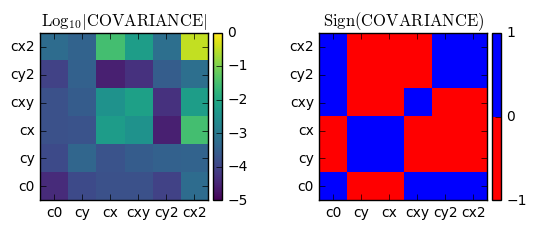

In [13]:
# Plot the covariance matrix to see correlations between the fit parameters
labels = ['','cx2', 'cy2', 'cxy', 'cx', 'cy', 'c0']

fig = plt.figure()

ax1 = fig.add_subplot(121)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cmap1 = mpl.cm.get_cmap('viridis')
bounds1 = [-5,-4,-3,-2,-1,0]
norm1 = mpl.colors.Normalize(vmin=np.amin(bounds1),vmax=np.amax(bounds1))
img1 = ax1.imshow(np.log10(np.absolute(pcov)), interpolation='nearest', cmap=cmap1, norm=norm1)
ax1.invert_xaxis()
plt.colorbar(img1, cmap=cmap1, cax=cax1, ticks=bounds1, norm=norm1)
ax1.set_title('$\mathrm{Log_{10} |COVARIANCE|}$')
ax1.set_yticklabels(labels)
ax1.set_xticklabels(labels)

ax2 = fig.add_subplot(122)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cmap2 = mpl.colors.ListedColormap(['red','blue'])
bounds2=[-1,0,1]
norm2 = mpl.colors.BoundaryNorm(bounds2, cmap2.N)
img2 = ax2.imshow(np.sign(pcov), interpolation='nearest', cmap=cmap2, norm=norm2)
ax2.invert_xaxis()
plt.colorbar(img2, cmap=cmap2, norm=norm2, boundaries=bounds2, ticks=bounds2, cax=cax2)
ax2.set_title('$\mathrm{Sign(COVARIANCE)}$')
ax2.set_yticklabels(labels)
ax2.set_xticklabels(labels)

plt.tight_layout(pad=3)

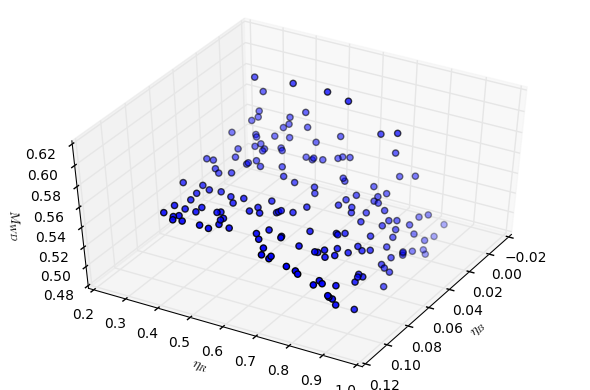

In [14]:
# Plot data
plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
splot = ax1.scatter(data[0], data[1], data[2], c='blue')
ax1.view_init(45, 30)
ax1.set_xlabel('$\\eta_B$')
ax1.set_ylabel('$\\eta_R$')
ax1.set_zlabel('$M_{WD}$')
plt.tight_layout()

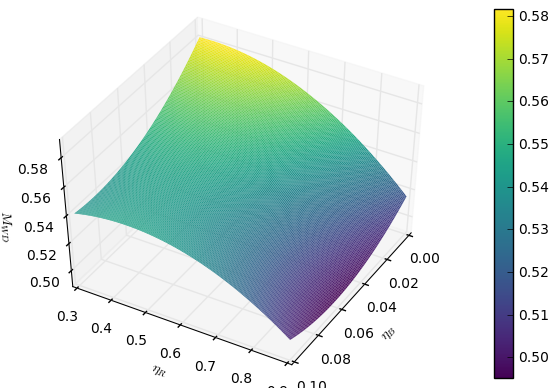

In [15]:
# Plot fit
plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
xvec = np.linspace(np.amin(data[0]), np.amax(data[0]), num=10*len(data[0]))
yvec = np.linspace(np.amin(data[1]), np.amax(data[1]), num=10*len(data[1]))
x, y = np.meshgrid(xvec, yvec)
zfit = quadratic_2d([x,y], *popt)
surf = ax1.plot_surface(x, y, zfit, cmap=mpl.cm.viridis, linewidth=0)
ax1.view_init(45, 30)
fig.colorbar(surf)
ax1.set_xlabel('$\\eta_B$')
ax1.set_ylabel('$\\eta_R$')
ax1.set_zlabel('$M_{WD}$')
plt.tight_layout()

In [20]:
# Get fit residuals
mfit = quadratic_2d(data[0:2], *popt)
resd = data[2] - mfit

print('min resd: {}\n'.format(np.amin(resd)))
print('max resd: {}\n'.format(np.amax(resd)))

# Sum of squares 
avgm = np.mean(data[2])
sqrs = data[2] - avgm
tssq = np.sum(sqrs**2)
print('total sum of squares is: {}\n'.format(tssq))

# Sum of squared residuals
ssrd = np.sum(resd**2)
print('sum of squared residuals: {}\n'.format(ssrd))
print('sqrt sum of squared residuals: {}\n'.format(np.sqrt(ssrd)))

# Sum of squared (residual/data)
ssrn = np.sum((resd/data[2])**2)
print('sum of squared (residual/data): {}\n'.format(ssrn))
print('sqrt sum of squared (residual/data): {}\n'.format(np.sqrt(ssrn)))

# Calculate R^2 = 1 - ssrd/tssq
FUV = ssrd/tssq
R2 = 1. - FUV
print('R-squared value is: {}\n'.format(R2))

min resd: -0.0148396241201

max resd: 0.0241371075393

total sum of squares is: 0.0781395187938

sum of squared residuals: 0.00579131684003

sqrt sum of squared residuals: 0.0761007019681

sum of squared (residual/data): 0.0189508417194

sqrt sum of squared (residual/data): 0.137662056208

R-squared value is: 0.925884918036



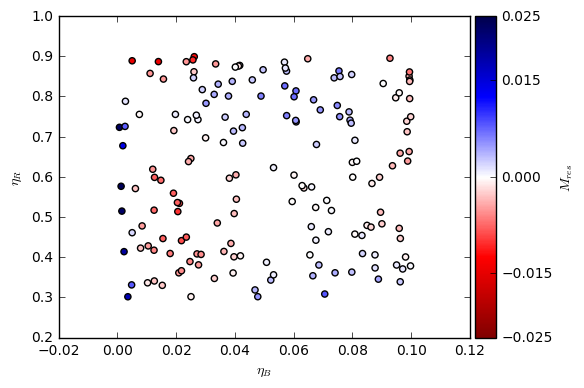

In [17]:
# Plot Residuals on the eta domain
fig = plt.figure()
ax1 = fig.add_subplot(111)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cmap1 = mpl.cm.get_cmap('seismic_r')
bounds1 = [-0.025,-0.015,0,0.015,0.025]
norm1 = mpl.colors.Normalize(vmin=np.amin(bounds1),vmax=np.amax(bounds1))
img1 = ax1.scatter(data[0], data[1], c=resd, cmap=cmap1, norm=norm1)
#ax1.invert_xaxis()
plt.colorbar(img1, cmap=cmap1, cax=cax1, ticks=bounds1, norm=norm1, label='$M_{res}~(M_{\odot})$')
#ax1.set_title('$\mathrm{Log_{10} |COVARIANCE|}$')
ax1.set_ylabel('$\eta_R$')
ax1.set_xlabel('$\eta_B$')
plt.tight_layout()

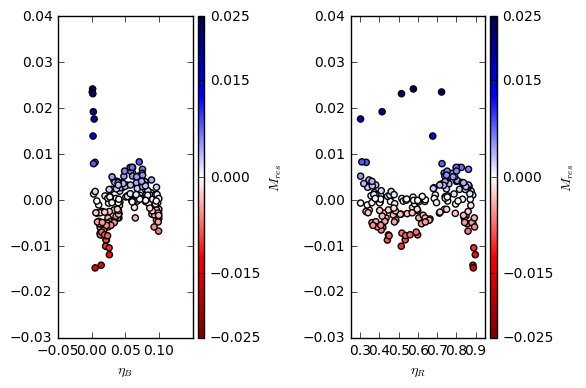

In [18]:
# Plot projected residuals
fig = plt.figure()

ax1 = fig.add_subplot(121)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cmap1 = mpl.cm.get_cmap('seismic_r')
bounds1 = [-0.025,-0.015,0,0.015,0.025]
norm1 = mpl.colors.Normalize(vmin=np.amin(bounds1),vmax=np.amax(bounds1))
img1 = ax1.scatter(data[0], resd, c=resd, cmap=cmap1, norm=norm1)
ax1.set_xlim([-0.05, 0.15])
#ax1.invert_xaxis()
plt.colorbar(img1, cmap=cmap1, cax=cax1, ticks=bounds1, norm=norm1, label='$M_{res}~(M_{\odot})$')
#ax1.set_title('$\mathrm{Log_{10} |COVARIANCE|}$')
ax1.set_xlabel('$\eta_B$')

ax2 = fig.add_subplot(122)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cmap2 = mpl.cm.get_cmap('seismic_r')
bounds2 = [-0.025,-0.015,0,0.015,0.025]
norm2 = mpl.colors.Normalize(vmin=np.amin(bounds2),vmax=np.amax(bounds2))
img2 = ax2.scatter(data[1], resd, c=resd, cmap=cmap2, norm=norm2)
ax2.set_xlim([0.25, 0.95])
#ax2.invert_xaxis()
plt.colorbar(img2, cmap=cmap2, cax=cax2, ticks=bounds2, norm=norm2, label='$M_{res}~(M_{\odot})$')
#ax2.set_title('$\mathrm{Log_{10} |COVARIANCE|}$')
ax2.set_xlabel('$\eta_R$')

plt.tight_layout()